# COVID-19 Analysis

**Author(s):** Charles Norona (cnorona1@gmail.com) and Diego Rosano (diegodsr@gmail.com).

Based sourced from Johns Hopkins data repository at Github URL below.

ARCGIS Dashboard: https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
Github repository with data: https://github.com/CSSEGISandData/COVID-19

## Introduction/Concept
This study aims to analyze the Novel Coronavirus (COVID-19) statistics captured by the Johns Hopkins data repository (mentioned above). Below analyses intend to examine other countries in addition to China and draw comparisons. It is expected that the number of cases over time will reach a saturation point when the virus' transmissability has been exhausted [Need literature citations].~~using the concept known as the **dose–response relationship**, or **exposure–response relationship** (Need proper reference(s) but for now: https://en.wikipedia.org/wiki/Dose%E2%80%93response_relationship).~~

Using this principle, it may be possible to model the ~~exposure-response~~ curve to determine how far along each region or country is to responding to the exposure of the Novel Coronavirus.

In [1]:
# Import the libraries.
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
# Load the data source into data frames.
dataFrameConfirmedCases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
dataFrameDeathsCases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

# Remove unused columns from both data sets.
dataFrameConfirmedCases = dataFrameConfirmedCases.drop(
    columns = [
        'UID',
        'iso2',
        'iso3',
        'code3',
        'FIPS',
        'Admin2',
        'Combined_Key'
    ]
)
dataFrameDeathsCases = dataFrameDeathsCases.drop(
    columns = [
        'UID',
        'iso2',
        'iso3',
        'code3',
        'FIPS',
        'Admin2',
        'Combined_Key',
        'Population'
    ]
)

#dataFrameConfirmedCases
dataFrameDeathsCases

,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,American Samoa,US,-14.271000,-170.132000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,13.444300,144.793700,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,US,15.097900,145.673900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,US,18.220800,-66.590100,0,0,0,0,0,0,...,42,44,45,45,51,56,58,60,62,63
4,Virgin Islands,US,18.335800,-64.896300,0,0,0,0,0,0,...,1,1,1,1,1,1,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Utah,US,39.372319,-111.575868,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3257,Utah,US,38.996171,-110.701396,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3258,Utah,US,37.854472,-111.441876,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3259,Utah,US,40.124915,-109.517442,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Melt down the various pivot tables
dataFrameConfirmedCasesMelted = pd.melt(
    dataFrameConfirmedCases,
    id_vars = [
        'Province_State',
        'Country_Region',
        'Lat',
        'Long_'
    ],
    var_name = 'Date',
    value_name = 'value'
)
dataFrameConfirmedCasesMelted['classification'] = 'Confirmed Cases'
dataFrameConfirmedCasesMelted

,Province_State,Country_Region,Lat,Long_,Date,value,classification
0,American Samoa,US,-14.271000,-170.132000,1/22/20,0,Confirmed Cases
1,Guam,US,13.444300,144.793700,1/22/20,0,Confirmed Cases
2,Northern Mariana Islands,US,15.097900,145.673900,1/22/20,0,Confirmed Cases
3,Puerto Rico,US,18.220800,-66.590100,1/22/20,0,Confirmed Cases
4,Virgin Islands,US,18.335800,-64.896300,1/22/20,0,Confirmed Cases
...,...,...,...,...,...,...,...
293485,Utah,US,39.372319,-111.575868,4/20/20,17,Confirmed Cases
293486,Utah,US,38.996171,-110.701396,4/20/20,7,Confirmed Cases
293487,Utah,US,37.854472,-111.441876,4/20/20,70,Confirmed Cases
293488,Utah,US,40.124915,-109.517442,4/20/20,10,Confirmed Cases


In [4]:
dataFrameDeathCasesMelted = pd.melt(
    dataFrameDeathsCases,
    id_vars = [
        'Province_State',
        'Country_Region',
        'Lat',
        'Long_'
    ],
    var_name = 'Date',
    value_name = 'value'
)
dataFrameDeathCasesMelted['classification'] = 'Deaths'
dataFrameDeathCasesMelted

,Province_State,Country_Region,Lat,Long_,Date,value,classification
0,American Samoa,US,-14.271000,-170.132000,1/22/20,0,Deaths
1,Guam,US,13.444300,144.793700,1/22/20,0,Deaths
2,Northern Mariana Islands,US,15.097900,145.673900,1/22/20,0,Deaths
3,Puerto Rico,US,18.220800,-66.590100,1/22/20,0,Deaths
4,Virgin Islands,US,18.335800,-64.896300,1/22/20,0,Deaths
...,...,...,...,...,...,...,...
293485,Utah,US,39.372319,-111.575868,4/20/20,0,Deaths
293486,Utah,US,38.996171,-110.701396,4/20/20,0,Deaths
293487,Utah,US,37.854472,-111.441876,4/20/20,1,Deaths
293488,Utah,US,40.124915,-109.517442,4/20/20,0,Deaths


In [5]:
# Union or join the tables row-wise. Append dataframes of like schemas together.
data_frame = dataFrameConfirmedCasesMelted.append(
    dataFrameDeathCasesMelted
)
data_frame

,Province_State,Country_Region,Lat,Long_,Date,value,classification
0,American Samoa,US,-14.271000,-170.132000,1/22/20,0,Confirmed Cases
1,Guam,US,13.444300,144.793700,1/22/20,0,Confirmed Cases
2,Northern Mariana Islands,US,15.097900,145.673900,1/22/20,0,Confirmed Cases
3,Puerto Rico,US,18.220800,-66.590100,1/22/20,0,Confirmed Cases
4,Virgin Islands,US,18.335800,-64.896300,1/22/20,0,Confirmed Cases
...,...,...,...,...,...,...,...
293485,Utah,US,39.372319,-111.575868,4/20/20,0,Deaths
293486,Utah,US,38.996171,-110.701396,4/20/20,0,Deaths
293487,Utah,US,37.854472,-111.441876,4/20/20,1,Deaths
293488,Utah,US,40.124915,-109.517442,4/20/20,0,Deaths


In [6]:
# Make sure that the Date column is being treated as a date-time data type.
data_frame['Date'] = pd.to_datetime( data_frame['Date'] )

# Make sure that dataframe is sorted by date in order since it is causing issues in pivot table.
data_frame = data_frame.sort_values('Date')
data_frame

,Province_State,Country_Region,Lat,Long_,Date,value,classification
0,American Samoa,US,-14.271000,-170.132000,2020-01-22,0,Confirmed Cases
1092,Kentucky,US,37.428239,-83.688114,2020-01-22,0,Deaths
1091,Kentucky,US,38.516791,-84.824046,2020-01-22,0,Deaths
1090,Kentucky,US,38.397911,-85.448222,2020-01-22,0,Deaths
1089,Kentucky,US,37.477518,-86.853681,2020-01-22,0,Deaths
...,...,...,...,...,...,...,...
292397,Oklahoma,US,34.587817,-99.411388,2020-04-20,6,Confirmed Cases
292396,Oklahoma,US,35.049126,-96.249211,2020-04-20,0,Confirmed Cases
292395,Oklahoma,US,35.222576,-95.115133,2020-04-20,2,Confirmed Cases
292405,Oklahoma,US,35.702709,-96.881246,2020-04-20,10,Confirmed Cases


In [7]:
# Save the cleaned up, combined data set as a CSV.
data_frame.to_csv('combined_data_set_us_state.csv')

In [8]:
# Form a single pivot table with all relevant data points for visualization. Sum all results.
pivot_table_province = pd.pivot_table(
    data_frame, 
    index = [
        'Province_State',
        'Date'
    ],
    columns = [ 
        'classification',
    ],
    values = [
        'value'
    ],
    aggfunc = 'sum'
)
pivot_table_province

value       
classification            Confirmed Cases Deaths
Province_State Date                             
Alabama        2020-01-22               0      0
               2020-01-23               0      0
               2020-01-24               0      0
               2020-01-25               0      0
               2020-01-26               0      0
...                                   ...    ...
Wyoming        2020-04-16             296      2
               2020-04-17             305      2
               2020-04-18             309      2
               2020-04-19             313      2
               2020-04-20             317      2

[5220 rows x 2 columns]

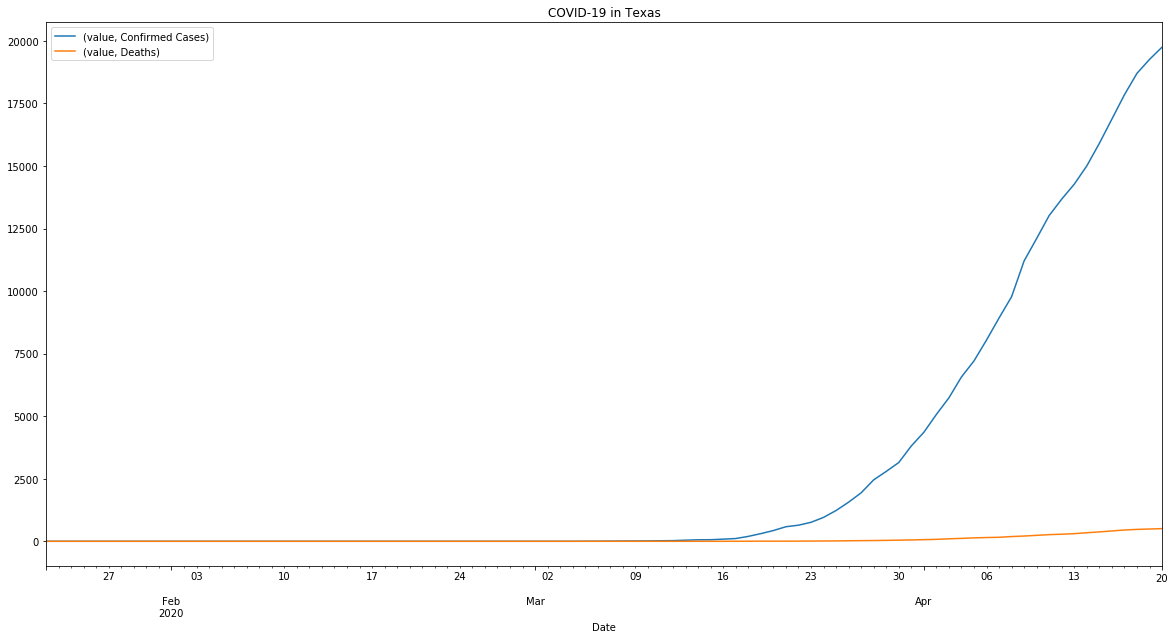

In [9]:
# Choose which country to chart and visualize the statistics.
country = 'US'
province = 'Texas'
pivot_table_country = pivot_table_province.xs( (province) )
#pivot_table_country
plot = pivot_table_country.plot(
    figsize  = (20, 10),
    kind = "line",
    title = "COVID-19 in " + province,
)
plot.legend(loc = "upper left")